# PHYS 434 Lab 1
#### Haowen Guan

Initializing the environment as below:

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.signal
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1: Finding Gamma-ray source
<br> In a observation, the background noise is a kind of cosmic-rays that follows a Poisson distruibution.
<br> Assume the average cosmic-ray background is 5, and the average number of gamma-rays emitted by the hypothetical source is 10.
<br> 
<br> **1. A)** The background distribution can be follow:

Text(0, 0.5, 'Probability')

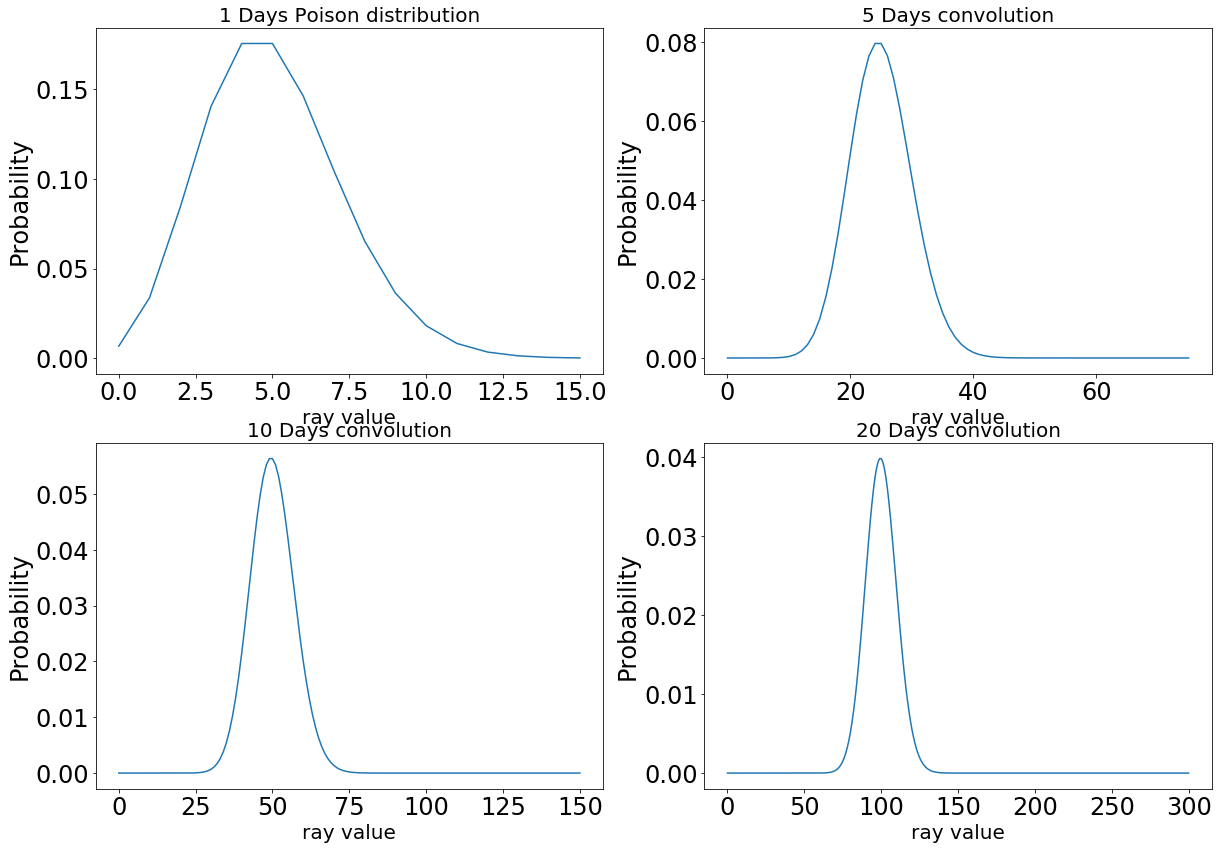

In [57]:
x = np.linspace(0, 15, 15 + 1)
results = stats.poisson.pmf(k = x, mu = 5)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,14)
ax[0,0].plot(x, results)
# ax[0].set_xlim([0, 50])
ax[0,0].set_title("1 Days Poison distribution", fontsize=20)
ax[0,0].tick_params(labelsize = 24)
ax[0,0].set_xlabel("ray value", fontsize=20)
ax[0,0].set_ylabel("Probability", fontsize=24)
conv = results
for i in range(4):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[0,1].plot(np.linspace(0, 75, 15 * 5 + 1), conv)
ax[0,1].set_title("5 Days convolution", fontsize=20)
ax[0,1].tick_params(labelsize = 24)
ax[0,1].set_xlabel("ray value", fontsize=20)
ax[0,1].set_ylabel("Probability", fontsize=24)
for i in range(5):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,0].plot(np.linspace(0, 150, 15 * 10 + 1), conv)
ax[1,0].set_title("10 Days convolution", fontsize=20)
ax[1,0].tick_params(labelsize = 24)
ax[1,0].set_xlabel("ray value", fontsize=20)
ax[1,0].set_ylabel("Probability", fontsize=24)
for i in range(10):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,1].plot(np.linspace(0, 300, 15 * 20 + 1), conv)
ax[1,1].set_title("20 Days convolution", fontsize=20)
ax[1,1].tick_params(labelsize = 24)
ax[1,1].set_xlabel("ray value", fontsize=20)
ax[1,1].set_ylabel("Probability", fontsize=24)

**Observation: After integrate the probability distribtion for few days, It shifts right and its distribution get wider.**

**1. B)** 

Text(0, 0.5, 'Count')

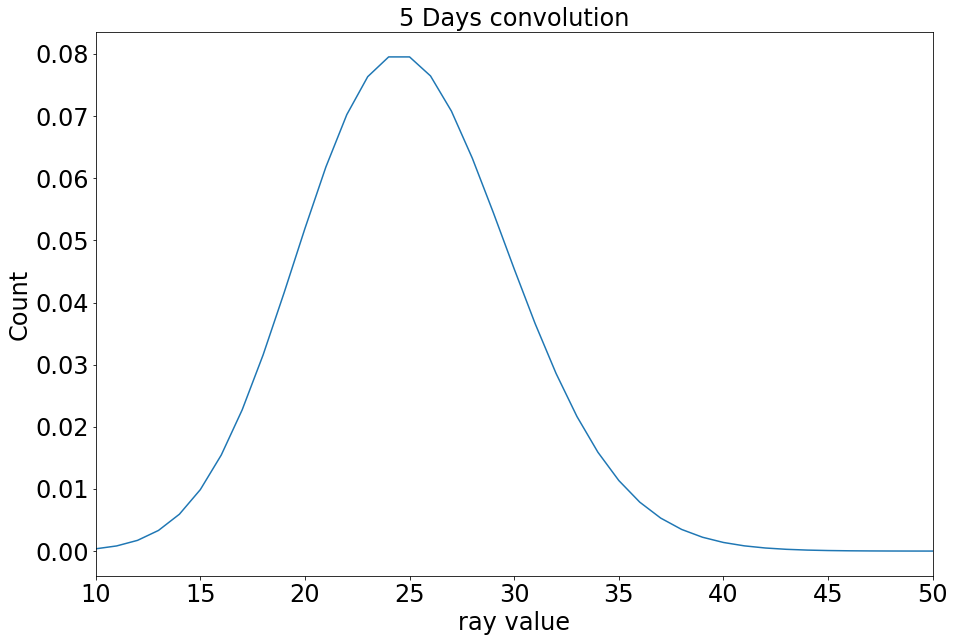

In [10]:
x = np.linspace(0, 15, 16)
results = stats.poisson.pmf(k = x, mu = 5)
fig.set_size_inches(10,7) 
conv = results
for i in range(4):
    conv = scipy.signal.fftconvolve(results,conv,'full')
plt.plot(np.linspace(0,75,76), conv)
plt.tick_params(labelsize = 24)
plt.xlim([10, 50])
plt.title("5 Days convolution", fontsize=24)
plt.xlabel("ray value", fontsize=24)
plt.ylabel("Probability", fontsize=24)

**observation:** This is still a Poisson distribution. This make sense as convolution is esentially doing summnation. No matter how many times a poisson distrbution is add onto another same poisson distribution, they are still poisson distribution.

**1. C)** distribution of average

Text(0, 0.5, 'Probability')

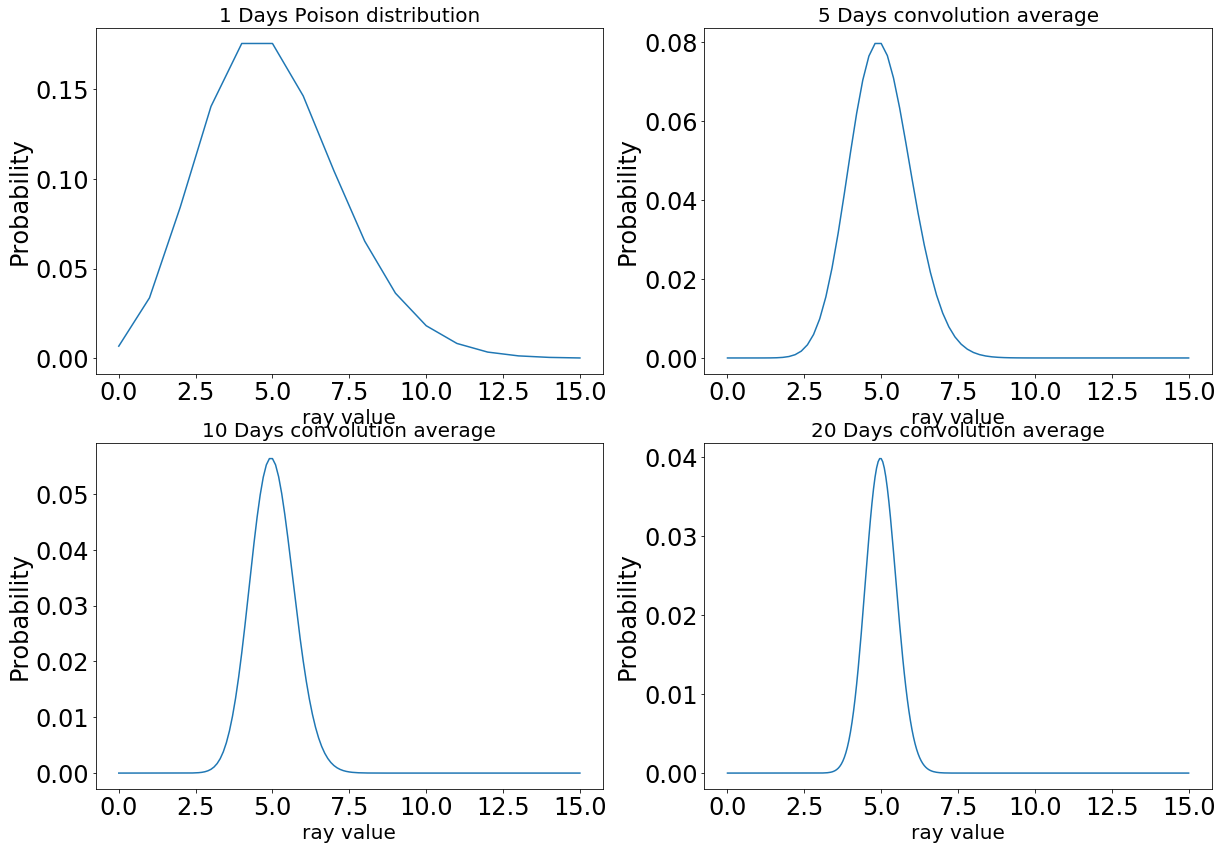

In [33]:
x = np.linspace(0, 15, 16)
results = stats.poisson.pmf(k = x, mu = 5)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,14)
ax[0,0].plot(x, results)
# ax[0].set_xlim([0, 50])
ax[0,0].set_title("1 Days Poison distribution", fontsize=20)
ax[0,0].tick_params(labelsize = 24)
ax[0,0].set_xlabel("ray value", fontsize=20)
ax[0,0].set_ylabel("Probability", fontsize=24)
conv = results
for i in range(4):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[0,1].plot(np.linspace(0, 15, 15 * 5 + 1), conv)
ax[0,1].set_title("5 Days convolution average", fontsize=20)
ax[0,1].tick_params(labelsize = 24)
ax[0,1].set_xlabel("ray value", fontsize=20)
ax[0,1].set_ylabel("Probability", fontsize=24)
for i in range(5):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,0].plot(np.linspace(0, 15, 15 * 10 + 1), conv)
ax[1,0].set_title("10 Days convolution average", fontsize=20)
ax[1,0].tick_params(labelsize = 24)
ax[1,0].set_xlabel("ray value", fontsize=20)
ax[1,0].set_ylabel("Probability", fontsize=24)
for i in range(10):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,1].plot(np.linspace(0, 15, 15 * 20 + 1), conv)
ax[1,1].set_title("20 Days convolution average", fontsize=20)
ax[1,1].tick_params(labelsize = 24)
ax[1,1].set_xlabel("ray value", fontsize=20)
ax[1,1].set_ylabel("Probability", fontsize=24)

**observation:** As the number of days becomes larger, the convlution distribution become narrower, and more concentrate to the mean value.
<br> **Compare with summation** These graghs is esentially the same plot with the summation we see in previous part. While the reason we see the distribution is wider in summation and the agverage is narrower is that, in summation, distributions are accumulating and the width of central part only increase, but since the central parts increase faster than the edges as they have bigger values, the ratio of the central parts and fringe part are higher in convolution, so once we average the summation distribution back to original range, it seems narrower.
<br> **Central limit theorem** we can observe that, as the number of day increase, it's distribution is more and more tends to be a gaussian distribution. The reason is same as above, that as the convolute many times, the ratio of the central parts and fringe part gets bigger, thus the distribution tends to emphasize the central mean value, and the edge becomes less and less distinguishable. Evantually, it looks like a guassian distribution.

<br>  **1. D)**
<br> I picked N = 10.
<br> **Null hypothesis:** If there is no signal, then we expect the background to be Poisson distributed with a mean of 5 for a convolution of 10 days. The stronger the signal, the more events we expect. So what is the probability of observing $ >=10*10=100$ gamma-rays in 10 days? 

In [46]:
x = np.linspace(0, 15, 16)
results = stats.poisson.pmf(k = x, mu = 5)
conv = results
for i in range(9):
    conv = scipy.signal.fftconvolve(results,conv,'full')
probability = 0;
for i in range(99, 151):
    probability += conv[i]
print("Probability of seeing 100 gamma rays in 10 days is: ", probability)
print("sigma is: ", stats.norm.ppf(1 - probability))

Probability of seeing 100 gamma rays in 10 days is:  4.110069130522364e-10
sigma is:  6.140617355145252


## Problem 2
**Continuous distribution:** Chi-Square distribtuion.
<br> **2. A)** Some demonstration of average over more observing intervals as below

Text(0, 0.5, 'Probability')

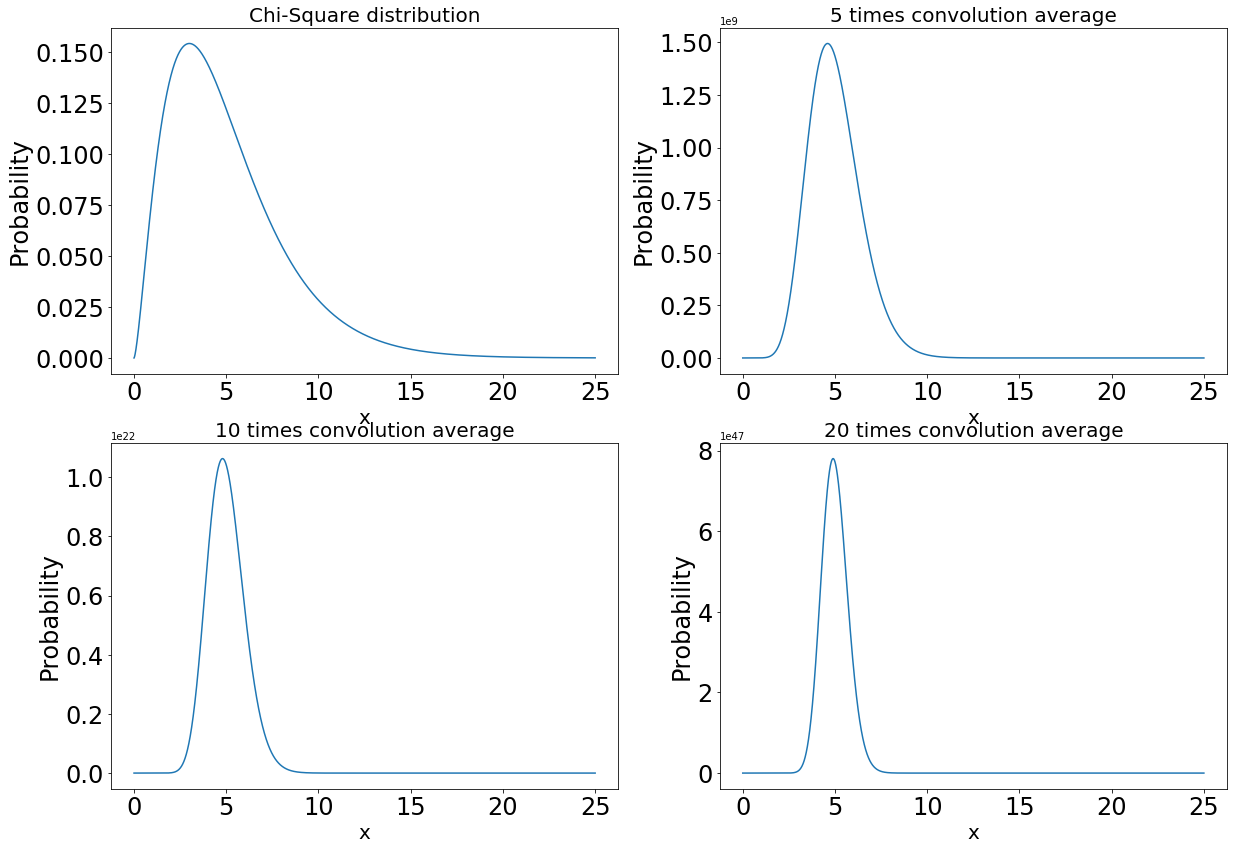

In [56]:
x = np.linspace(0, 25, 10000)
results = stats.chi2.pdf(x, df = 5.)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,14)
ax[0,0].plot(x, results)
# ax[0].set_xlim([0, 50])
ax[0,0].set_title("Chi-Square distribution", fontsize=20)
ax[0,0].tick_params(labelsize = 24)
ax[0,0].set_xlabel("x", fontsize=20)
ax[0,0].set_ylabel("Probability", fontsize=24)
conv = results
for i in range(4):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[0,1].plot(np.linspace(0, 25, 10000 * 5 - 4), conv)
ax[0,1].set_title("5 times convolution average", fontsize=20)
ax[0,1].tick_params(labelsize = 24)
ax[0,1].set_xlabel("x", fontsize=20)
ax[0,1].set_ylabel("Probability", fontsize=24)
for i in range(5):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,0].plot(np.linspace(0, 25, 10000 * 10 - 9), conv)
ax[1,0].set_title("10 times convolution average", fontsize=20)
ax[1,0].tick_params(labelsize = 24)
ax[1,0].set_xlabel("x", fontsize=20)
ax[1,0].set_ylabel("Probability", fontsize=24)
for i in range(10):
    conv = scipy.signal.fftconvolve(results,conv,'full')
ax[1,1].plot(np.linspace(0, 25, 10000 * 20 - 19), conv)
ax[1,1].set_title("20 times convolution average", fontsize=20)
ax[1,1].tick_params(labelsize = 24)
ax[1,1].set_xlabel("x", fontsize=20)
ax[1,1].set_ylabel("Probability", fontsize=24)

**Observation: with summing and averaging more observing intervals, its distribution get narrower.**

**2. B)**  Yes, it approaches a Guassian distribution. Start from N=10.

## Problem 3
Assume the width of the background Gaussian distruibution is 2.
<br> **2. A)** Assume the signal I saw have a strength 6.7.

In [63]:
print("Probability of this detection is: ", 1 - stats.norm.cdf(6.7/2))
print("Sigma is: ", stats.norm.ppf(stats.norm.cdf(6.7/2)))

Probability of this detection is:  0.00040405780186403284
Sigma is:  3.349999999999992


We can't clain a discovery, since 3.35-sigma is less than the traditional value of 5-sigma

<br> **3. B)** The statistic question is, what is the probability distribution if we have 10k trials to consider?
The probability distribution will be the 10k times convolution of the original distribution.
<br> I tried to do the 10000 times convolution below, but I failed to achieve it. The compution time is too high.

Text(0, 0.5, 'Probability')

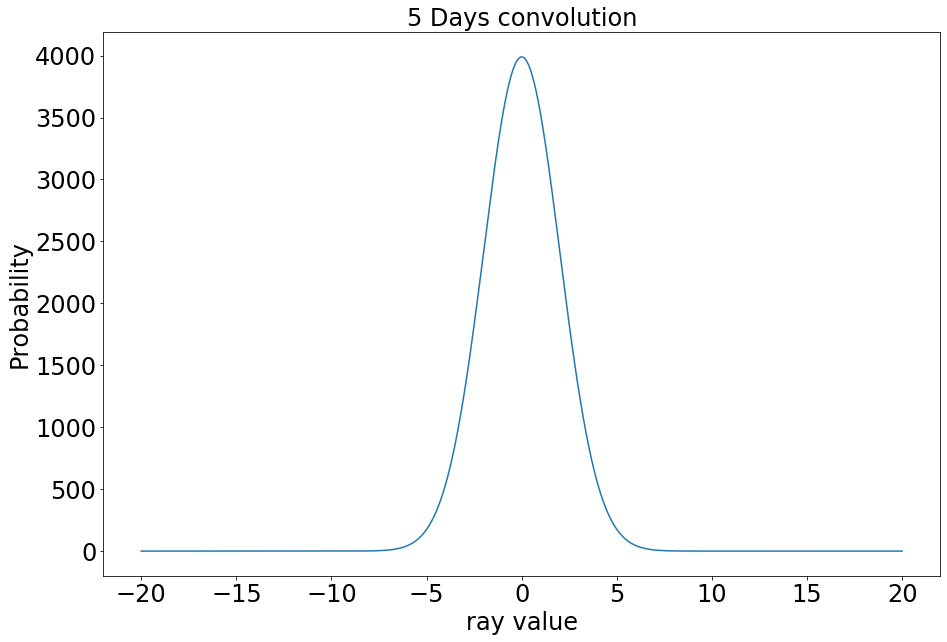

In [108]:
x = np.linspace(-10, 10, 10000)
results = stats.norm.pdf(x)
results = results * 10000

plt.plot(np.linspace(-10 * 2, 10 * 2, 10000), results)
plt.tick_params(labelsize = 24)
plt.title("5 Days convolution", fontsize=24)
plt.xlabel(x", fontsize=24)
plt.ylabel("Probability", fontsize=24)

<br> **3. C)**

In [114]:
x = np.linspace(-10, 10, 10000)
results = stats.norm.pdf(x)
results = results * 10000
print("Probability of this detection is: ", 10000*(1 - stats.norm.cdf(6.7/2)))

Probability of this detection is:  4.040578018640328
Sigma is:  -2.106673418553627


## Problem 4
<br> **4. A) & B)**

In [119]:
print("Version 1: signal correspond to a 5-sigma detection is ", 5 * 2)
print("Version 2: signal correspond to a 5-sigma detection is ", 2 * stats.norm.ppf(1 - ((1 - stats.norm.cdf(5))/10000)))

Version 1: signal correspond to a 5-sigma detection is  10
Version 2: signal correspond to a 5-sigma detection is  13.10107497378331


<br> **4. C)**
<br> It just has to be 3.1 units brighter than the version 1. 

Text(0, 0.5, 'Probability')

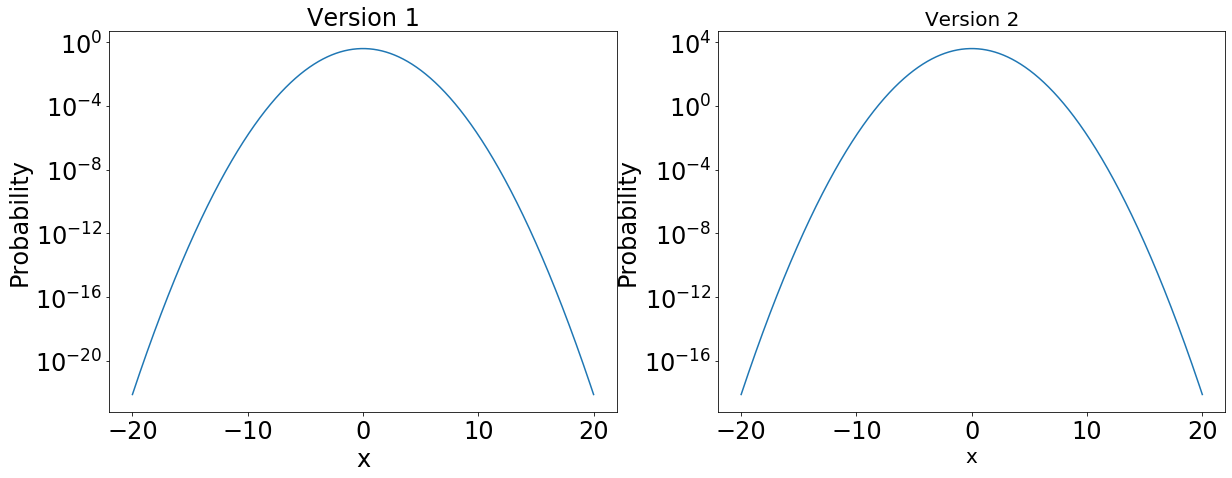

In [126]:
x = np.linspace(-10, 10, 10000)
results = stats.norm.pdf(x)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
ax[0].plot(np.linspace(-10 * 2, 10 * 2, 10000), results)
ax[0].set_title("Version 1", fontsize=24)
ax[0].set_yscale("log")
ax[0].tick_params(labelsize = 24)
ax[0].set_xlabel("x", fontsize=24)
ax[0].set_ylabel("Probability", fontsize=24)

results = results * 10000
ax[1].plot(np.linspace(-10 * 2, 10 * 2, 10000), results)
ax[1].set_title("Version 2", fontsize=20)
ax[1].set_yscale("log")
ax[1].tick_params(labelsize = 24)
ax[1].set_xlabel("x", fontsize=20)
ax[1].set_ylabel("Probability", fontsize=24)



The reason the sensitivity penalty is so low is that, by taking 10k trials, it esentually lift the distribution up by 1000, but normal distribution drop exponentially, as far away from the mean.

<br> **4. D)**
<br> below is example of 100000000, it just increased from 13.1 to 15.6

In [135]:
print("Version 2: signal correspond to a 5-sigma detection is ", 2 * stats.norm.ppf(1 - ((1 - stats.norm.cdf(5))/100000000)))

Version 2: signal correspond to a 5-sigma detection is  15.61761499383638
